# Filtering Images

FILES

https://github.com/ScryptIQ-ai/lesson-data/blob/main/dh/axon_slice.jpg
https://github.com/ScryptIQ-ai/lesson-data/blob/main/dh/rat_brain_low_res.jpg

PACKAGES

numpy
matplotlib

## Introduction

**Learning Objectives**
- How to extract thresholds for pixel intensities
- Applying boolean masks to filter an image
- Filtering with both greyscale and colour images

Now that we know that images essentially comprise of arrays of numerical intensities, we can start processing the images using said numbers. Much like how we can filter, augment the columns in a DataFrame or data in a Python list, images can be processed to highlight or exclude certain features. 

## Creating an Image Mask

VIDEO

https://www.youtube.com/watch?v=xJsCInqgLz4

In [ ]:
# Setup our workspace

from matplotlib.image import imread
from matplotlib.pyplot import subplots, show

img = imread('data/axon_slice.jpg')

In [ ]:
fig, ax = subplots(figsize=(10, 5))

ax.imshow(img, cmap='gray');

show()

As an initial approach, we can plot a histogram of the intensity values that comprise an image. We can make use of the `.flatten()` method to turn the original 2300 x 3040 array into a one-dimensional array with 6,992,000 values. This rearrangement allows the numbers within the image to be represented by a single column inside a matrix or DataFrame.

The histogram plot shows how several instances of each intensity make up this image:

In [ ]:
fig, ax = subplots(figsize=(10, 4))

ax.hist(img.flatten(), bins = 50)
ax.set_xlabel("Pixel intensity", fontsize=16);

show()

The histogram is a distribution, with intensities mostly lying between values of 50 and 250.

The image displays a slice through an axon bundle. For the sake of example, let's say that we are now interested in the myelin sheath surrounding the axons (the dark rings). We can create a **mask** that isolates pixels whose intensity value is below a certain threshold (because darker pixels have lower intensity values). Everything below this threshold can be assigned to, for instance, a value of 1 (representing True), and everything above will be assigned a value of 0 (representing False). This is called a binary or Boolean mask.

Based on the histogram above, we might want to try adjusting that threshold somewhere between 100 and 200. Let's see what we get with a threshold set to 125. Firstly, we must implement a conditional statement in order to create the mask. It is then possible to apply this mask to the image. We can then plot both the mask and the masked image.

*Try playing around with the threshold value to see how it affects the mask.*

In [ ]:
threshold = 125

mask = img < threshold

img_masked = img * mask

fig, ax = subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Binary mask', fontsize=16)
ax[1].imshow(img_masked, cmap='gray')
ax[1].set_title('Masked image', fontsize=16)

show()

The left subplot shows the binary mask itself. White represents values where our condition is true, and black where our condition is false. The right image shows the original image after we have applied the binary mask, showing the original pixel intensities in regions where the mask value is `True`.

Note that applying the mask means that the intensities where the condition is true are left unchanged. The intensities where the condition is false are multiplied by zero, and therefore set to zero.

Let's have a look at the resulting image histograms.

In [ ]:
threshold = 125
mask = img < threshold
img_masked = img * mask

fig, ax = subplots(nrows=1, ncols=2, figsize=(20, 5))

ax[0].hist(img_masked.flatten(), bins=50)
ax[0].set_title('Histogram of masked image', fontsize=16)
ax[0].set_xlabel("Pixel intensity", fontsize=16)

# != tells the filter to only keep values that are not equal to 0
ax[1].hist(img_masked[img_masked != 0].flatten(), bins=25)
ax[1].set_title('Histogram of masked image after zeros are removed', fontsize=16)
ax[1].set_xlabel("Pixel intensity", fontsize=16)

show()

The left subplot displays the values for the masked image. Note that there is a large peak at zero, as a large part of the image is masked. The right subplot histogram, however, displays only the non-zero pixel intensities. From this, we can see that our mask has worked as expected, where only values up to 125 are found. This is because our threshold causes a sharp cut-off at a pixel intensity of 125.

## Filtering Colour Images

The same process can be applied to colour images, except this time we will be filtering based on the intensities of one channel (red, green, or blue) and applying this to all of the channels. 

For this demonstration, we will be using a rat brain slice we used in the previous lesson.

In [ ]:
rat_brain = imread('./data/rat_brain_low_res.jpg')

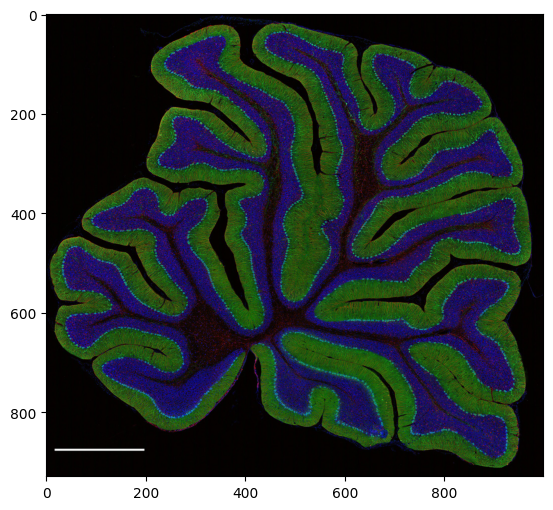

In [12]:
fig, ax = subplots(figsize=(10, 6))

ax.imshow(rat_brain);

show()

The sample is labeled for Hoechst stain (blue), the Inositol trisphosphate (IP3) receptor (green) and Glial fibrillary acidic protein (GFAP) (red).

### Splitting the channels

Once again we seperate the image by each channel to see the fluorescence signal. Rather than artifically colour it through cmap, as we did preiously, we will leave the colour scale grey so we can more easily compare the intensity in differeing sections. From these images it is clear the IP3 stain (green)is clearly demarking the Purkinje cell layer, above the granular cell layer highlighted in blue by the Hoechst stain..

In [ ]:
red, green, blue = 0, 1, 2

fig, ax = subplots(ncols=3, figsize=(20,10))

ax[0].imshow(rat_brain[:, :, red], cmap='gray')
ax[0].set_title('Red Channel')

ax[1].imshow(rat_brain[:, :, green], cmap='gray')
ax[1].set_title('Green Channel')

ax[2].imshow(rat_brain[:, :, blue], cmap='gray');
ax[2].set_title('Blue Channel');

Plotting a histogram of the pixel intensities in the green channel show a clear bimodal distribution, separated by a trough at around the 50 mark.

In [ ]:
fig, ax = subplots()

image_green = rat_brain[:, :, green]

image_green_flattened = image_green.flatten()

ax.hist(image_green_flattened, bins=60);

In this instance we are interested in areas with high intensity values, as they indicate the purkinje cells. We will create a mask that is True only when the pixels are higher than the threshold. Multiplying the image by the mask will keep all the values above the threshold at the **same** value, those below will become `0`.

We can see this effect clearly when comparing the boolean mask image, which is either black or white, with the image being imaged where the white portions have some variation.

*Try playing around with the threshold value to see how it affects the mask.*

In [ ]:
threshold = 60

mask = image_green > threshold

image_masked = image_green * mask

fig, ax = subplots(ncols=3)

ax[0].imshow(image_green, cmap='gray');
ax[0].set_title("Green Channel");
ax[0].axis("off");

ax[1].imshow(mask, cmap='gray');
ax[1].set_title("Boolean Mask");
ax[1].axis("off");

ax[2].imshow(image_masked, cmap='gray');
ax[2].set_title("Masked Image");
ax[2].axis("off");

fig.tight_layout()

Now we have our mask we need to apply it to the other channels and recompose our image with all **three** channels. To do so we actually need to flip the boolean mask, changing the Trues to False and the False to True. We can do this using the `~` operator.

We do this because we want to zero out the pixels that are not above the threshold, by setting them to 0 through assignment. Here our mask tells the assignment value where to set the values to 0 and where to leave them, with the former being True and the latter being False. We therefore want the pixels below the threshold to be True and not False as they were before. Take some time to think about this, as it can feel unintuitive at first.

*Run the cell with differing thresholds to see how well you can isolate the purkinje cells.*

In [ ]:
# Copy the orignal image incase of change
img_masked = rat_brain.copy()

# Recreate the mask
background = 0
threshold = 60
mask = image_green > threshold

# We apply the ~ here to flip the mask
img_masked[~mask, :] = background

fig, ax = subplots()

ax.imshow(img_masked)
ax.axis("off");

We now have a full colour image, where the pixel intensities are only present where the co-locate with pixels higher than our threshold in the green channel. Removing the background creates a clear distinction between the purkinje cells and their surroundings. You could then proceed to obtain statistics on the size of the layer by extrating its volume.

## Summary

Something